# "[DL] 딥러닝 입문1"
> "Sin함수"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [DL, Sin, Pytorch]
- author: 도형준

# 사인 함수 예측하기

모델 정의 -><br>
[모델 순전파 (입력층->노드->출력층) -> 오차 계산 -> 오차 역전파 (가중치 업데이트)]<br>
원하는만큼 반복 (손실(에러) 최소화) -> 학습 종료 -> 모델 사용

## 사인곡선 그리기

In [ ]:
import math
import torch
import matplotlib.pyplot as plt

In [ ]:
# 점을 추출 -pi ~ pi 1000개를 추출
# torch.linspace(시작점, 끝점, 갯수)
x = torch.linspace(-math.pi, math.pi, 1000)
x

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850, -3.0787, -3.0724, -3.0661, -3.0598, -3.0535, -3.0473,
        -3.0410, -3.0347, -3.0284, -3.0221, -3.0158, -3.0095, -3.0032, -2.9969,
        -2.9906, -2.9844, -2.9781, -2.9718, -2.9655, -2.9592, -2.9529, -2.9466,
        -2.9403, -2.9340, -2.9278, -2.9215, -2.9152, -2.9089, -2.9026, -2.8963,
        -2.8900, -2.8837, -2.8774, -2.8711, -2.8649, -2.8586, -2.8523, -2.8460,
        -2.8397, -2.8334, -2.8271, -2.8208, -2.8145, -2.8083, -2.8020, -2.7957,
        -2.7894, -2.7831, -2.7768, -2.7705, -2.7642, -2.7579, -2.7516, -2.7454,
        -2.7391, -2.7328, -2.7265, -2.7202, -2.7139, -2.7076, -2.7013, -2.6950,
        -2.6888, -2.6825, -2.6762, -2.6699, -2.6636, -2.6573, -2.6510, -2.6447,
        -2.6384, -2.6321, -2.6259, -2.6196, -2.6133, -2.6070, -2.6007, -2.5944,
        -2.5881, -2.5818, -2.5755, -2.5693, -2.5630, -2.5567, -2.5504, -2.5441,
        -2.5378, -2.5315, -2.5252, -2.51

In [ ]:
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)
y

tensor([ 8.7423e-08, -6.2894e-03, -1.2579e-02, -1.8867e-02, -2.5155e-02,
        -3.1442e-02, -3.7728e-02, -4.4012e-02, -5.0295e-02, -5.6575e-02,
        -6.2853e-02, -6.9129e-02, -7.5402e-02, -8.1672e-02, -8.7939e-02,
        -9.4202e-02, -1.0046e-01, -1.0672e-01, -1.1297e-01, -1.1922e-01,
        -1.2546e-01, -1.3170e-01, -1.3793e-01, -1.4415e-01, -1.5037e-01,
        -1.5659e-01, -1.6280e-01, -1.6900e-01, -1.7520e-01, -1.8139e-01,
        -1.8757e-01, -1.9374e-01, -1.9991e-01, -2.0607e-01, -2.1222e-01,
        -2.1836e-01, -2.2449e-01, -2.3062e-01, -2.3673e-01, -2.4284e-01,
        -2.4893e-01, -2.5502e-01, -2.6110e-01, -2.6716e-01, -2.7322e-01,
        -2.7926e-01, -2.8530e-01, -2.9132e-01, -2.9733e-01, -3.0333e-01,
        -3.0932e-01, -3.1529e-01, -3.2125e-01, -3.2720e-01, -3.3314e-01,
        -3.3906e-01, -3.4497e-01, -3.5087e-01, -3.5675e-01, -3.6262e-01,
        -3.6848e-01, -3.7431e-01, -3.8014e-01, -3.8595e-01, -3.9174e-01,
        -3.9752e-01, -4.0329e-01, -4.0903e-01, -4.1

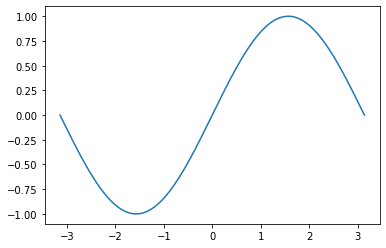

In [ ]:
plt.plot(x, y)

## 모델 정의
- $ax^3 + bx^2 + cx + d$

In [ ]:
# 임의의 가중치(계수)를 뽑아서 예측 사인 곡선 => y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
# a, b, c, d = [torch.randn(()) for i in range(4)]
a, b, c, d

(tensor(-0.0574), tensor(0.0201), tensor(0.1902), tensor(0.1745))

In [ ]:
y_random = a * x**3 + b * x**2 + c * x + d

## 실제 값과 비교

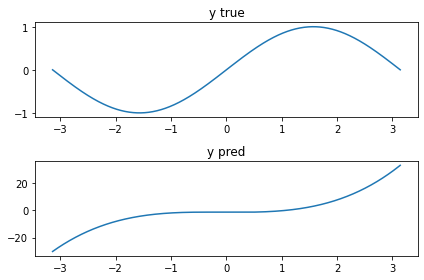

In [ ]:
# 사인곡선 비교
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

# 예측 사인곡선 -> 임의의 가중치 y값
plt.subplot(2, 1, 2)
plt.title('y pred')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

## 학습을 통해 가중치 적용

In [ ]:
learning_rate = 1e-6 # 학습률 정의

# 학습 2,000번 진행
# for epoch in range(2000):
# for epoch in range(5000):
for epoch in range(20000):
    y_pred = a * x**3 + b * x**2 + c * x + d
    # y -> 사인 함수를 사용해서 구한 값 (정답)
    loss = (y_pred - y).pow(2).sum().item() # 손실(에러) 정의
    if epoch % 100 == 0:
        print(f"epoch({epoch+1}) loss:{loss}")
    
    grad_y_pred = 2.0 * (y_pred - y) # 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a # 가중치를 업데이트 (기울기의 반대방향 * -1)
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

epoch(1) loss:133826.640625
epoch(101) loss:1533.369873046875
epoch(201) loss:1272.6195068359375
epoch(301) loss:1056.6358642578125
epoch(401) loss:877.6801147460938
epoch(501) loss:729.3613891601562
epoch(601) loss:606.3997802734375
epoch(701) loss:504.4312438964844
epoch(801) loss:419.8472900390625
epoch(901) loss:349.66510009765625
epoch(1001) loss:291.416015625
epoch(1101) loss:243.05752563476562
epoch(1201) loss:202.89923095703125
epoch(1301) loss:169.54165649414062
epoch(1401) loss:141.825439453125
epoch(1501) loss:118.79039764404297
epoch(1601) loss:99.64085388183594
epoch(1701) loss:83.7173080444336
epoch(1801) loss:70.47269439697266
epoch(1901) loss:59.453582763671875
epoch(2001) loss:50.283599853515625
epoch(2101) loss:42.6506233215332
epoch(2201) loss:36.29547119140625
epoch(2301) loss:31.002899169921875
epoch(2401) loss:26.594099044799805
epoch(2501) loss:22.920774459838867
epoch(2601) loss:19.85942268371582
epoch(2701) loss:17.307525634765625
epoch(2801) loss:15.1798124313

## 결과 확인하기

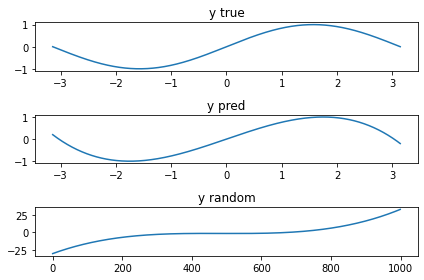

In [ ]:
# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(y_random)

# 출력
plt.tight_layout()
plt.show()